# Введение


Для первого домашнего задания был выбран набор данных под названием **"World Countries Rankings by Suicide Rate 2023"** (Рейтинг стран мира по уровню самоубийств в 2023 году)


In [ ]:
from google.colab import files
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *


uploaded = files.upload()

Saving world_suicide_rate_2023.csv to world_suicide_rate_2023.csv


In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['world_suicide_rate_2023.csv']))
df.head(10)

,Country,All,Female,Male,M/F,2000,Change%
0,World,9.0,5.4,12.6,2.3,14.0,-0.36
1,Lithuania,48.5,6.2,36.1,5.8,45.8,-0.56
2,Kiribati,30.6,9.5,53.6,5.7,35.6,-0.14
3,Micronesia,29.0,13.2,44.3,3.4,28.0,0.04
4,Suriname,25.9,11.8,41.3,3.5,25.0,0.04
5,Zimbabwe,23.6,13.5,37.8,2.8,20.0,0.18
6,South Africa,23.5,9.8,37.9,3.9,26.6,-0.12
7,Mozambique,23.2,8.9,42.6,4.8,20.9,0.11
8,Central African Republic,23.0,9.3,39.6,4.3,32.5,-0.29
9,Russia,21.6,7.2,38.2,5.3,48.9,-0.56


# Анализ данных

Числовые данные представлены столбцами:

**Country** - Название страны

**All**- Количество самоубийств среди людей любого пола на 100 000 человек в 2023 году

**Female** - Количество самоубийств среди женщин на 100 000 человек

**Male** - Количество самоубийств среди мужчин на 100 000 человек

**M/F** - Отношение количества самоубийств среди мужчин к количеству самоубийств среди женщин (второго столбца к первому)

**2000** - Количество самоубийств среди людей любого пола на 100 000 человек в 2000 году

**Change %** - Процентное изменение общего числа самоубийств с 2000 по 2023 год.

In [ ]:
df.describe()

,All,Female,Male,M/F,2000,Change%
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,9.471271,4.295028,14.781768,3.727072,12.796685,-0.200276
std,6.329179,2.666964,9.721200,1.762727,8.979012,0.272220
min,0.300000,0.200000,0.000000,0.000000,1.700000,-0.880000
25%,5.200000,2.200000,7.500000,2.500000,6.400000,-0.360000
50%,8.300000,3.800000,13.300000,3.400000,10.900000,-0.210000
75%,12.200000,5.800000,19.400000,4.500000,16.900000,-0.090000
max,48.500000,13.500000,53.600000,13.400000,48.900000,0.690000


Для процентного изменения общего числа самоубийств с 2000 по 2023 год значения медианы (50 квартиль) и среднего практически совпадают, для других данных разница между ними больше. Нетрудно заметить, что среднее для общего числа самоубийств 2023 года скорее находится ближе к минимальному значению (Барбадос, Индия), чем к максимальному (Литва). Аналогичную закономерность мы можем наблюдать и в 2000 году.

# Проверка на нормальность

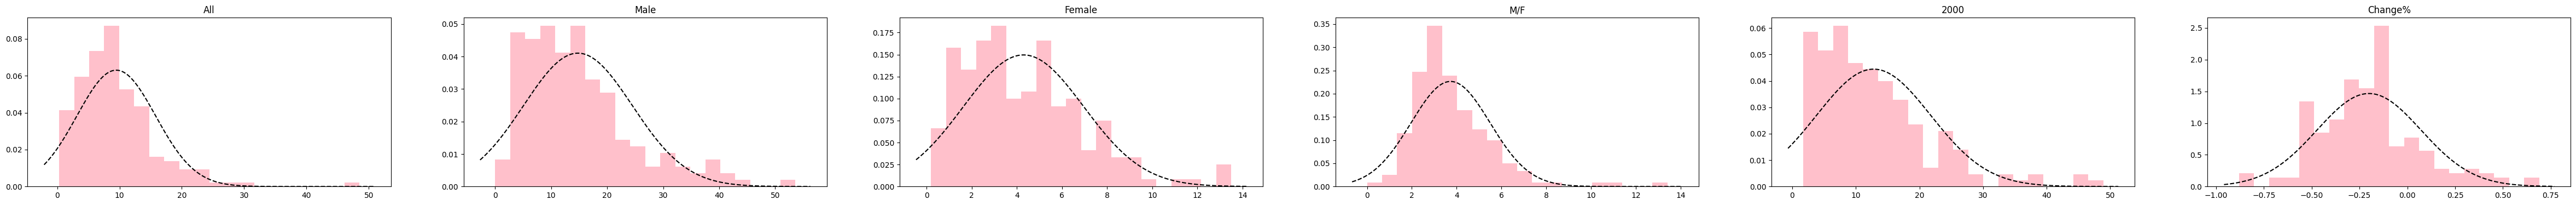

In [ ]:
keys = ['All', 'Male', 'Female', 'M/F','2000','Change%']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(10 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True,bins =20, color = 'pink')

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 1000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed', color = 'black')
    ax.set_title(key)

На представленных графиках распределения видно, что нормальным является только распределение по процентому изменению числа самоубийств с 2000 по 2023 год. Распределение по общему количеству самобуийств и числу самоубийств среди женщин и мужчин являются положительными распределениями.

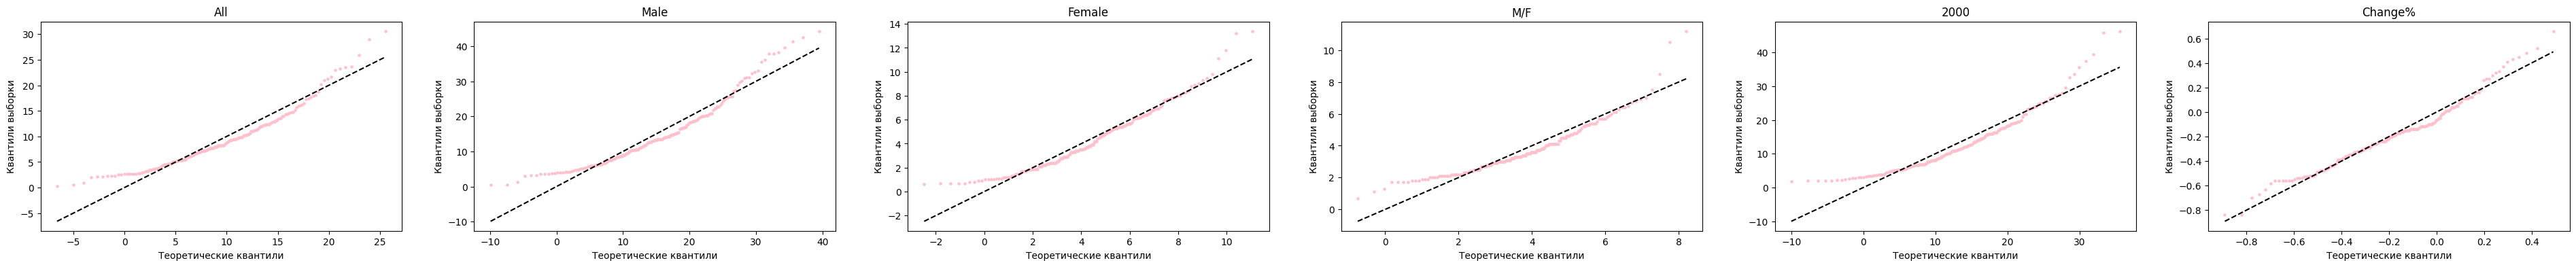

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5, color = 'pink')
    ax.plot(x, x, color = 'black', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('Теоретические квантили')
    ax.set_ylabel('Квантили выборки')

По построенным Q-Q прямым оценки на нормальность каждого распределения, сделанного раннее, подтвердились. Только для распределения по процентому изменению числа самоубийств с 2000 по 2023 год две прямая квантилей выборки и теоретических квантилей практически совпадают.

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

All
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7569060773480663
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9558011049723757
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9834254143646409

Male
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7292817679558011
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9447513812154696
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.988950276243094

Female
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.712707182320442
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9668508287292817
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9834254143646409

M/F
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7955801104972375
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9668508287292817
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9834254143646409

2000
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7348066298342542
2 sigma(s)
	theoretical:

Приведенные расчеты определяют вероятность попадания в интервалы:
1. от μ - σ до μ + σ
2. от μ - 2σ до μ + 2σ
3. от μ - 3σ до μ + 3σ

Если расчётные цифры (sample) оказываются близки к теоретическим (theoretical), то распределения действительно является нормальными.

Тот факт, что часть из данных распределений является нормальными позволяет использовать другие методы для анализа взаимосвязей в данных.

# Поиск зависимость между распределениями

In [ ]:
df[['All','Male', 'Female', 'M/F','2000','Change%']].corr()

,All,Male,Female,M/F,2000,Change%
All,1.000000,0.938201,0.783797,0.207172,0.836708,-0.000637
Male,0.938201,1.000000,0.762564,0.319045,0.850361,0.006086
Female,0.783797,0.762564,1.000000,-0.254154,0.634608,0.101062
M/F,0.207172,0.319045,-0.254154,1.000000,0.219068,0.036312
2000,0.836708,0.850361,0.634608,0.219068,1.000000,-0.379969
Change%,-0.000637,0.006086,0.101062,0.036312,-0.379969,1.000000


На основе предположенных данных можно предположить приближенную к прямой зависимость между количеством самоубийств среди мужчин и общим числом самоубийств (поскольку самоубийств среди мужчин в целом больше, то чем больше число самоубийств среди мужчин, тем больше общее число самоубийств). Остальные же величины мало коррелируют друг с другом и возможно имеют другой характер зависимости.

# Статистический тест

Подтвердим прямую зависимость между числом самоубийств мужчин и общим числом самоубийств с помощью статистического теста.

In [ ]:
n = 181
m = 1

k1 = m
k2 = n - m - 1
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
print('t =',t)

ones = np.ones((n,m))
x_pot = np.hstack((ones, df['Male'].values.reshape(n,m)))
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['All'])
z = x_pot.dot(b)
e = df['All'] - z

R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['All']))


F = (R / k1) / ((1 - R) / k2)
print ('F =', F)

t = 3.8939343352282787
F = 1315.4310560311433


Параметр F больше параметра t, значит, прямая зависимость есть. Полученный результат был визуализирован.

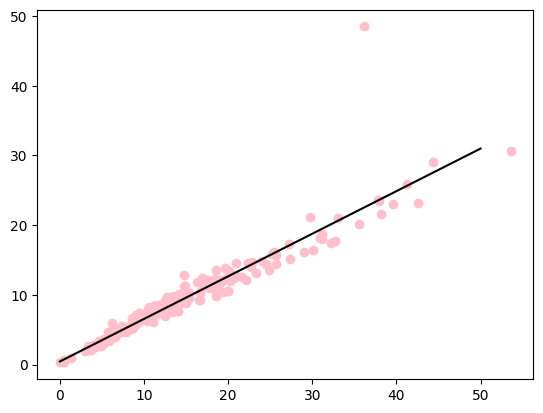

In [ ]:
b1 = np.cov(df['All'], df['Male'], ddof=1)[0, 1] / np.var(df['Male'], ddof=1)
b0 = df['All'].mean() - b1 * df['Male'].mean()

plt.scatter(df['Male'], df['All'], color = 'pink')
x = np.linspace(0, 50, 600)
y = b1*x + b0
plt.plot(x, y, color = 'black')
plt.show()

# Страны, в которых число самоубийств увеличилось

In [ ]:
df1 = df.sort_values(by=['Change%'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)
df2 = df1[0:16]
print(df2)

             Country   All  Female  Male  M/F  2000  Change%
0           Paraguay   6.2     3.3   9.0  2.8   3.6     0.69
1             Cyprus   3.2     1.1   5.3  5.0   1.9     0.66
2        South Korea  21.2    13.4  29.7  2.2  13.9     0.52
3             Brunei   2.5     0.8   4.2  5.4   1.7     0.48
4      United States  14.5     6.8  22.4  3.3  10.0     0.45
5             Brazil   6.4     2.8  10.3  3.7   4.5     0.43
6       Saudi Arabia   5.4     1.9   7.8  4.1   3.8     0.41
7             Mexico   5.3     2.2   8.7  4.0   3.9     0.37
8            Bahamas   3.4     1.2   5.8  4.7   2.5     0.33
9           Portugal   7.2     3.5  11.6  3.4   5.5     0.32
10           Uruguay  18.8     7.7  31.1  4.1  14.5     0.30
11            Greece   3.6     1.5   5.9  4.1   2.9     0.27
12            Guinea  12.3     8.0  18.4  2.3   9.7     0.27
13  Papua New Guinea   3.6     1.9   5.2  2.7   2.8     0.26
14          Zimbabwe  23.6    13.5  37.8  2.8  20.0     0.18
15        Azerbaijan   4

С помощью данной таблицы наглядно показано, в каких странах процент самоубийств увеличился больше всего (первые 15 стран по числу самоубийств). Если сопоставить данную таблицу с распределением параметра Change% , то можно видить, что они совпадают.

# Итоги

На основе полученных данных можно сделать следующие результаты: число самоубийств среди мужчин превышает число самоубийств среди женщин и вносит основной вклад в общее число самоубийств. К счастью, в большинстве стран мы наблюдаем уменьшение самоубийств за последние 23 года. Это может быть связано с разными факторами. Было бы интересно проанализировать эти данные с учетом возрастных групп и других причин.